In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('1.04. Real-life example.csv')
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [3]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data_wmv = data.dropna(axis=0)

In [5]:
data_wmv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
q = data['Price'].quantile(0.99)
q

126902.15999999917

In [7]:
data_1 = data_wmv[data_wmv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3983,3983.000000,3983,3983.000000,3983.000000,3983,3983,3983.000000,3983
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1527,NaN,NaN,1853,3612,NaN,188
mean,NaN,17809.152388,NaN,165.157419,2.743204,NaN,NaN,2006.290485,NaN
std,NaN,18896.368435,NaN,102.746510,4.956550,NaN,NaN,6.671809,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6970.000000,NaN,93.000000,1.800000,NaN,NaN,2002.500000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [8]:
data_2 = data_1[data_1['EngineV']<6.5]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3960.000000,3960.000000,3960.000000,3960.000000
mean,17862.431303,164.976515,2.442058,2006.305808
std,18929.387385,102.829228,0.943725,6.672369
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,93.000000,1.800000,2003.000000
50%,11500.000000,160.000000,2.200000,2007.000000
75%,21200.000000,230.000000,3.000000,2011.000000
max,126000.000000,980.000000,6.300000,2016.000000


In [9]:
data_3 = data_2[data_2['Year']>1975]
data_3.describe()

,Price,Mileage,EngineV,Year
count,3959.000000,3959.000000,3959.000000,3959.000000
mean,17858.102794,164.980298,2.441968,2006.315231
std,18929.818396,102.841942,0.943828,6.646807
min,600.000000,0.000000,0.600000,1978.000000
25%,6999.000000,93.000000,1.800000,2003.000000
50%,11500.000000,160.000000,2.200000,2007.000000
75%,21100.000000,230.000000,3.000000,2011.000000
max,126000.000000,980.000000,6.300000,2016.000000


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

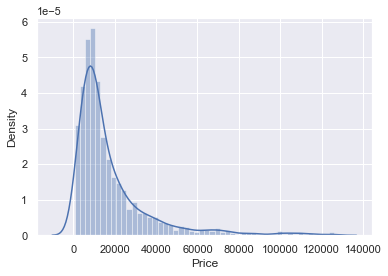

In [10]:
sns.distplot(data_3['Price'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

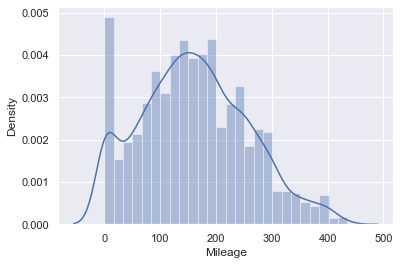

In [11]:
q_1 = data_3['Mileage'].quantile(0.99)
data_4 = data_3[data_3['Mileage']<q_1]
data_4.describe()
sns.distplot(data_4['Mileage'])

In [12]:
data_4.describe()

,Price,Mileage,EngineV,Year
count,3919.000000,3919.000000,3919.000000,3919.000000
mean,17955.697617,161.323297,2.442753,2006.413116
std,18961.459900,96.058908,0.945541,6.568642
min,600.000000,0.000000,0.600000,1978.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2008.000000
75%,21500.000000,229.000000,3.000000,2012.000000
max,126000.000000,435.000000,6.300000,2016.000000


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

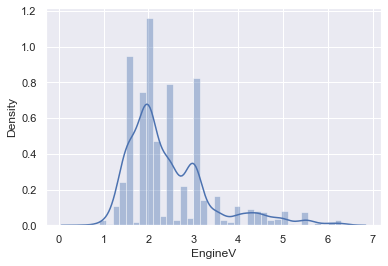

In [13]:
sns.distplot(data_4['EngineV'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

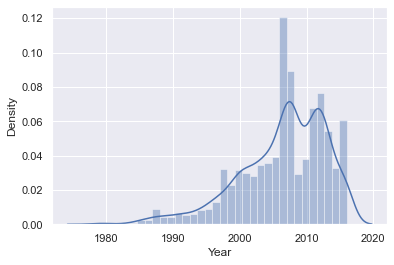

In [14]:
sns.distplot(data_4['Year'])

In [15]:
data_4 = data_4[data_4['Year']>1990]
data_4.describe()

,Price,Mileage,EngineV,Year
count,3809.000000,3809.000000,3809.000000,3809.000000
mean,18394.340801,159.325282,2.455566,2006.972959
std,19053.090224,94.342578,0.951951,5.745390
min,800.000000,0.000000,0.600000,1991.000000
25%,7400.000000,90.000000,1.800000,2003.000000
50%,11800.000000,156.000000,2.200000,2008.000000
75%,21900.000000,222.000000,3.000000,2012.000000
max,126000.000000,435.000000,6.300000,2016.000000


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

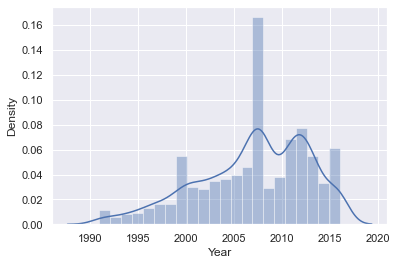

In [16]:
sns.distplot(data_4['Year'])

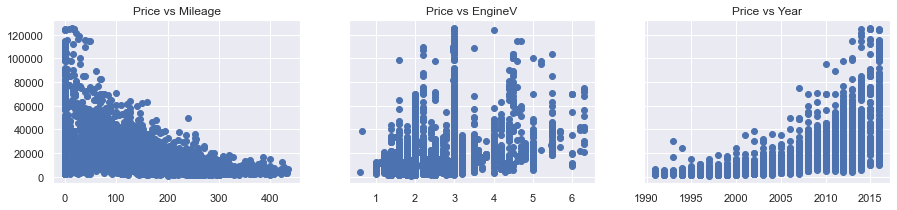

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey= True, figsize=(15, 3))
ax1.scatter(data_4['Mileage'], data_4['Price'])
ax1.set_title('Price vs Mileage')
ax2.scatter(data_4['EngineV'], data_4['Price'])
ax2.set_title('Price vs EngineV')
ax3.scatter(data_4['Year'], data_4['Price'])
ax3.set_title('Price vs Year')

plt.show()

In [18]:
log_price = np.log(data_4['Price'])
data_4['log_price'] = log_price
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

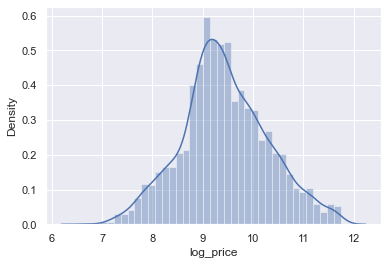

In [19]:
sns.distplot(data_4['log_price'])

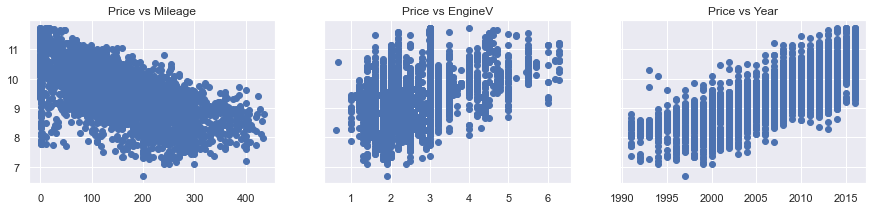

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey= True, figsize=(15, 3))
ax1.scatter(data_4['Mileage'], data_4['log_price'])
ax1.set_title('Price vs Mileage')
ax2.scatter(data_4['EngineV'], data_4['log_price'])
ax2.set_title('Price vs EngineV')
ax3.scatter(data_4['Year'], data_4['log_price'])
ax3.set_title('Price vs Year')

plt.show()

In [21]:
data_5 = data_4.reset_index(drop=True)
data_5

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3804,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3805,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3806,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3807,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = data_5[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
vif['Features']  = variable.columns

vif

,VIF,Features
0,3.826416,Mileage
1,7.652611,EngineV
2,10.333898,Year


In [23]:
data_6 = data_5.drop('Year', axis=1)

In [24]:
data_7 = data_6.drop('Price', axis=1)

In [25]:
data_7

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,Rav 4,9.814656
...,...,...,...,...,...,...,...,...
3804,Volkswagen,van,163,2.5,Diesel,yes,T5 (Transporter),9.350102
3805,Toyota,sedan,35,1.6,Petrol,yes,Corolla,9.792556
3806,Mercedes-Benz,sedan,9,3.0,Diesel,yes,S 350,11.736069
3807,BMW,sedan,1,3.5,Petrol,yes,535,8.779557


In [26]:
data_8 = pd.get_dummies(data_7, drop_first= True)
data_8

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,163,2.5,9.350102,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3805,35,1.6,9.792556,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3806,9,3.0,11.736069,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3807,1,3.5,8.779557,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_8.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_19',
       'Model_190', 'Model_200', 'Model_210', 'Model_220', 'Model_230',
       'Model_250', 'Model_316', 'Model_318', 'Model_320', 'Model_323',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735',
       'Model_740', 'Model_745', 'Model_

In [28]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_19',
       'Model_190', 'Model_200', 'Model_210', 'Model_220', 'Model_230',
       'Model_250', 'Model_316', 'Model_318', 'Model_320', 'Model_323',
       'Model_325', 'Model_328', 'Model_330', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_4Runner',
       'Model_5 Series', 'Model_5 Series GT', 'Model_520', 'Model_523',
       'Model_525', 'Model_528', 'Model_530', 'Model_535', 'Model_540',
       'Model_545', 'Model_550', 'Model_6 Series Gran Coupe', 'Model_630',
       'Model_640', 'Model_645', 'Model_650', 'Model_730', 'Model_735',
       'Model_740', 'Model_745', 'Model_750', 'Model_760', 'Model_80',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf III', 'Model_Golf IV', 'Model_Golf Plus',
       'Model_Golf V', 'Model_Golf VI', 'Model_Golf VII',
       'Model_Golf Variant', 'Model_Grand Scenic', 'Model_Grandis',
       'Model_Hiace', 'Model_Highlander', 'Model_Hilux', 'Model_I3',
       'Model_IQ', 'Model_Jetta', 'Model_Kangoo', 'Model_Koleos',
       'Model_L 200', 'Model_LT', 'Model_Laguna', 'Model_Lancer',
       'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T4 (Transporter)',
       'Model_T4 (Transporter) ', 'Model_T5 (Transporter)',
       'Model_T5 (Transporter) ', 'Model_T6 (Transporter)',
       'Model_T6 (Transporter) ', 'Model_TT', 'Model_Tacoma',
       'Model_Tiguan', 'Model_Touareg', 'Model_Touran', 'Model_Trafic',
       'Model_Tundra', 'Model_Up', 'Model_V 250', 'Model_Vaneo',
       'Model_Vento', 'Model_Venza', 'Model_Viano', 'Model_Virage',
       'Model_Vista', 'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5',
       'Model_X5 M', 'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3',
       'Model_Z4']

In [29]:
data_9 = data_8[cols]
data_9

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,9.350102,163,2.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3805,9.792556,35,1.6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3806,11.736069,9,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3807,8.779557,1,3.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data_test = data_9.drop(['log_price', 'Mileage', 'EngineV'], axis=1)
data_test.columns

Index(['Brand_BMW', 'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon',
       ...
       'Model_Vito', 'Model_X1', 'Model_X3', 'Model_X5', 'Model_X5 M',
       'Model_X6', 'Model_X6 M', 'Model_Yaris', 'Model_Z3', 'Model_Z4'],
      dtype='object', length=296)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_1 = pd.DataFrame()
variables_1 = data_test
vif_1['Features'] = variables_1.columns
vif_1['VIF'] = [variance_inflation_factor(variables_1.values, i) for i in range(variables_1.shape[1])]

print(vif_1)

E:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                Features         VIF
0              Brand_BMW  101.496963
1    Brand_Mercedes-Benz  366.023697
2       Brand_Mitsubishi         inf
3          Brand_Renault         inf
4           Brand_Toyota         inf
..                   ...         ...
291             Model_X6   38.644541
292           Model_X6 M    4.089292
293          Model_Yaris         inf
294             Model_Z3    2.020549
295             Model_Z4    6.078330

[296 rows x 2 columns]


In [32]:
data_test_1 = vif_1[vif_1['VIF']<10]
data_test_1

,Features,VIF
6,Body_hatch,7.030762
7,Body_other,5.867454
9,Body_vagon,7.071243
11,Engine Type_Gas,1.763659
12,Engine Type_Other,1.192433
...,...,...
283,Model_Viano,8.687919
290,Model_X5 M,8.204702
292,Model_X6 M,4.089292
294,Model_Z3,2.020549


In [33]:
data_test_1['Features'].values

array(['Body_hatch', 'Body_other', 'Body_vagon', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_250',
       'Model_316', 'Model_323', 'Model_325', 'Model_328', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_5 Series',
       'Model_5 Series GT', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_735', 'Model_740', 'Model_745', 'Model_760',
       'Model_80', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_B 170', 'Model_B 200',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 

In [34]:
data_test_2 = data_test[['Body_hatch', 'Body_other', 'Body_vagon', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_116', 'Model_118', 'Model_120', 'Model_190',
       'Model_200', 'Model_210', 'Model_220', 'Model_230', 'Model_250',
       'Model_316', 'Model_323', 'Model_325', 'Model_328', 'Model_335',
       'Model_4 Series Gran Coupe', 'Model_428', 'Model_5 Series',
       'Model_5 Series GT', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_735', 'Model_740', 'Model_745', 'Model_760',
       'Model_80', 'Model_A 140', 'Model_A 150', 'Model_A 170',
       'Model_A 180', 'Model_A1', 'Model_A3', 'Model_A4',
       'Model_A4 Allroad', 'Model_A5', 'Model_A6', 'Model_A6 Allroad',
       'Model_A7', 'Model_A8', 'Model_B 170', 'Model_B 200',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_G 320', 'Model_G 350', 'Model_G 55 AMG', 'Model_G 63 AMG',
       'Model_GL 420', 'Model_GL 450', 'Model_GL 500', 'Model_GL 550',
       'Model_GLC-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 400', 'Model_I3', 'Model_M6', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 400', 'Model_ML 430',
       'Model_ML 500', 'Model_ML 550', 'Model_ML 63 AMG', 'Model_Q3',
       'Model_Q5', 'Model_Q7', 'Model_R 320', 'Model_R8', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 400', 'Model_S 430',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Smart',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 315', 'Model_Sprinter 316',
       'Model_Sprinter 318', 'Model_Sprinter 319', 'Model_TT',
       'Model_Vaneo', 'Model_Viano', 'Model_X5 M', 'Model_X6 M',
       'Model_Z3', 'Model_Z4']]

In [35]:
data_test_2

,Body_hatch,Body_other,Body_vagon,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Model_100,Model_116,Model_118,...,Model_Sprinter 316,Model_Sprinter 318,Model_Sprinter 319,Model_TT,Model_Vaneo,Model_Viano,Model_X5 M,Model_X6 M,Model_Z3,Model_Z4
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3805,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3806,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3807,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data_test_2[['log_price', 'Mileage', 'EngineV']] = data_9[['log_price', 'Mileage', 'EngineV']]
data_test_2

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Body_hatch,Body_other,Body_vagon,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Model_100,Model_116,Model_118,...,Model_TT,Model_Vaneo,Model_Viano,Model_X5 M,Model_X6 M,Model_Z3,Model_Z4,log_price,Mileage,EngineV
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,8.342840,277,2.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,8.974618,427,2.9
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,9.495519,358,5.0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,10.043249,240,4.2
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,9.814656,120,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,9.350102,163,2.5
3805,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,9.792556,35,1.6
3806,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,11.736069,9,3.0
3807,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,8.779557,1,3.5


In [37]:
data_final = data_test_2

In [38]:
target = data_final['log_price']
inputs = data_final.drop(['log_price'], axis=1)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [40]:
inputs_scaled = scaler.transform(inputs)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [42]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [43]:
y_hat = reg.predict(x_train)

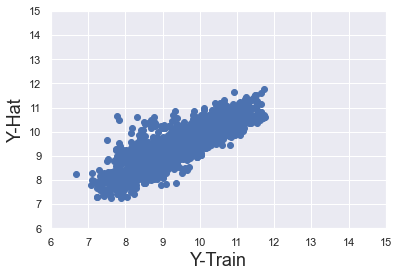

In [44]:
plt.scatter(y_train, y_hat)
plt.xlabel('Y-Train', size=18)
plt.ylabel('Y-Hat', size=18)
plt.xlim(6,15)
plt.ylim(6,15)
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

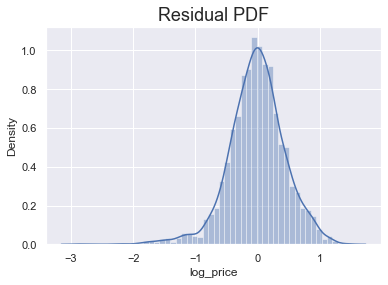

In [45]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [46]:
reg.score(x_train, y_train)

0.7177866272587756

In [47]:
reg.intercept_

333886173403.76355

In [48]:
reg.coef_

array([-5.93269307e-02, -5.19233526e-03, -3.24941253e-02, -1.15310920e-01,
       -3.06854369e-02, -1.31487459e-01,  3.01725875e-01, -6.68776521e-03,
        1.97238927e-02,  1.70781015e-02, -2.59699908e-02, -1.44446005e-02,
       -1.19533267e-03, -4.24041721e-03,  1.15701184e-02, -4.38390830e-04,
       -1.09435821e-03, -3.27572129e-03, -7.27463244e-03, -1.47834826e-02,
        4.85992422e-03,  2.62702674e-03,  1.42580165e-02, -7.89410411e+12,
        6.56463299e+12,  9.52119895e-03, -2.80735941e-02, -9.18581343e-03,
        1.81482362e-02,  1.40501364e-02,  5.09342794e+11,  2.86683675e-02,
       -1.30357339e-02, -6.95410547e-03, -7.90451016e-03, -6.66729681e-03,
       -2.04351894e-02, -1.55085120e-02, -1.39808237e-02,  1.07732564e-03,
        3.87636938e+12,  2.69039620e-03,  4.38390072e-03,  1.25660434e-02,
        3.35890382e-02,  8.63591126e-03,  2.36655628e-02,  3.51298988e-02,
        1.54318187e-02,  2.06285281e-02,  1.78147388e-02, -4.83112586e-03,
        8.57081752e-03,  

In [49]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights']= reg.coef_


In [50]:
reg_summary

,Features,Weights
0,Body_hatch,-0.059327
1,Body_other,-0.005192
2,Body_vagon,-0.032494
3,Engine Type_Gas,-0.115311
4,Engine Type_Other,-0.030685
...,...,...
133,Model_X6 M,0.013763
134,Model_Z3,-0.000144
135,Model_Z4,0.000241
136,Mileage,-0.452763


In [51]:
y_hat_test = reg.predict(x_test)

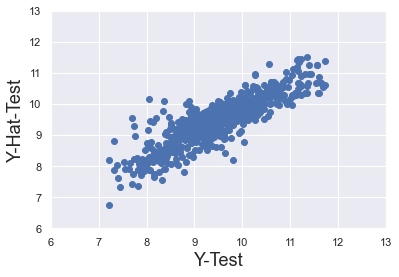

In [52]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Y-Test', size=18)
plt.ylabel('Y-Hat-Test', size=18)
plt.xlim(6,13)
plt.ylim(6,13)

plt.show()

In [58]:
pf_df = pd.DataFrame(np.exp(y_hat_test), columns =['Predictions'])
pf_df

C:\Users\Onkar\AppData\Local\Temp/ipykernel_16716/876848108.py:1: RuntimeWarning: overflow encountered in exp
  pf_df = pd.DataFrame(np.exp(y_hat_test), columns =['Predictions'])


,Predictions
0,11495.034174
1,12550.301899
2,9434.227792
3,8521.554054
4,15248.908163
...,...
757,1506.808359
758,15392.914693
759,7113.509322
760,13065.391825


In [60]:
pf_df['Target'] = np.exp(y_test)
pf_df

,Predictions,Target
0,11495.034174,NaN
1,12550.301899,7900.0
2,9434.227792,NaN
3,8521.554054,NaN
4,15248.908163,NaN
...,...,...
757,1506.808359,NaN
758,15392.914693,8600.0
759,7113.509322,NaN
760,13065.391825,NaN


In [61]:
y_test

167      9.472628
3757     9.809177
1160     8.922658
150      8.779557
3267     9.296518
          ...    
448      7.438384
3534     9.786954
2042     8.853665
640     10.122623
3174     9.449357
Name: log_price, Length: 762, dtype: float64

In [62]:
y_test = y_test.reset_index(drop= True)
y_test

0       9.472628
1       9.809177
2       8.922658
3       8.779557
4       9.296518
         ...    
757     7.438384
758     9.786954
759     8.853665
760    10.122623
761     9.449357
Name: log_price, Length: 762, dtype: float64

In [63]:
pf_df['Target'] = np.exp(y_test)
pf_df

,Predictions,Target
0,11495.034174,12999.0
1,12550.301899,18200.0
2,9434.227792,7500.0
3,8521.554054,6500.0
4,15248.908163,10900.0
...,...,...
757,1506.808359,1700.0
758,15392.914693,17800.0
759,7113.509322,7000.0
760,13065.391825,24900.0


In [66]:
pf_df['Residual'] = pf_df['Target'] - pf_df['Predictions']

pf_df['Difference%'] = np.absolute((pf_df['Residual']/pf_df['Target'])*100)

pd.options.display.max_rows=999
pf_df

,Predictions,Target,Residual,Difference%
0,1.149503e+04,12999.00,1.503966e+03,11.569858
1,1.255030e+04,18200.00,5.649698e+03,31.042297
2,9.434228e+03,7500.00,-1.934228e+03,25.789704
3,8.521554e+03,6500.00,-2.021554e+03,31.100832
4,1.524891e+04,10900.00,-4.348908e+03,39.898240
5,1.017720e+04,8950.00,-1.227201e+03,13.711740
6,1.825055e+04,16900.00,-1.350553e+03,7.991440
7,1.534414e+04,8300.00,-7.044138e+03,84.869129
8,1.576661e+04,14900.00,-8.666056e+02,5.816145
9,1.378970e+04,16300.00,2.510300e+03,15.400611


In [65]:
pf_df.describe()

,Predictions,Target,Residual,Difference%
count,7.620000e+02,762.000000,7.620000e+02,762.000000
mean,inf,18974.674081,-inf,inf
std,NaN,20125.720085,NaN,NaN
min,0.000000e+00,1350.000000,-inf,0.208024
25%,8.596519e+03,7500.000000,-2.868821e+03,12.372199
50%,1.312293e+04,11809.475000,-1.188904e+02,27.187492
75%,2.033141e+04,22500.000000,4.069249e+03,47.028082
max,inf,125000.000000,8.493712e+04,inf
